In [1]:
# Use the iris database to answer the following quesitons:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
#1. What does the distribution of petal lengths look like?

In [5]:
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## distplot( ) function:
- Draws a histogram and fits/plots a gaussian kernel density estimate (KDE)


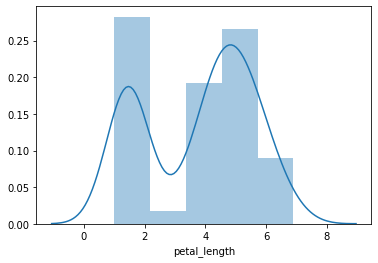

In [6]:
sns.distplot(iris.petal_length)

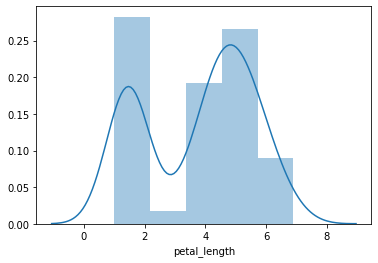

In [7]:
sns.distplot(iris.petal_length, kde=True)

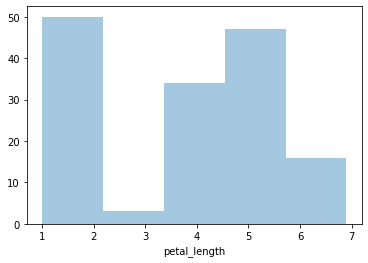

In [8]:
sns.distplot(iris.petal_length, kde=False)

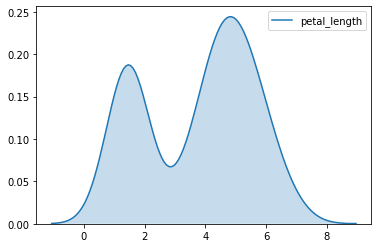

In [9]:
sns.kdeplot(iris.petal_length, shade=True)

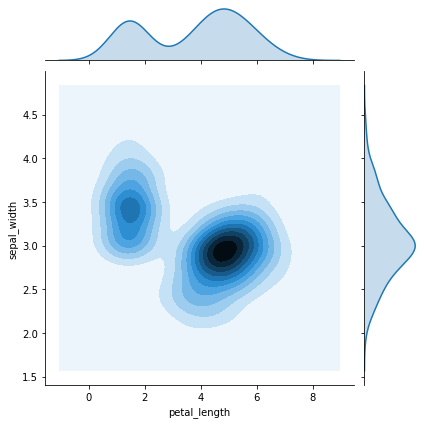

In [10]:
sns.jointplot(iris.petal_length, iris.sepal_width, kind="kde")

In [11]:
#2. Is there a correlation between petal length and petal width?

Text(0.5, 1, 'Petal length vs Petal width')

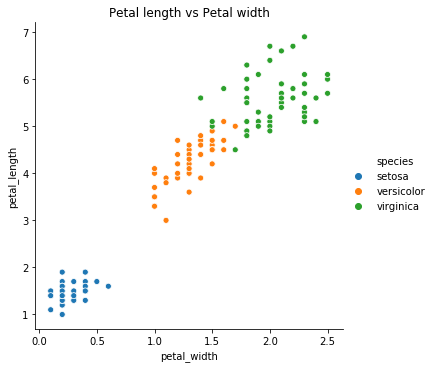

In [12]:
sns.relplot(x='petal_width', y='petal_length', hue="species", data=iris)
plt.title("Petal length vs Petal width")

In [13]:
#3. Would it be reasonable to predict species based on sepal width and sepal length?

In [14]:
iris.species.nunique()

3

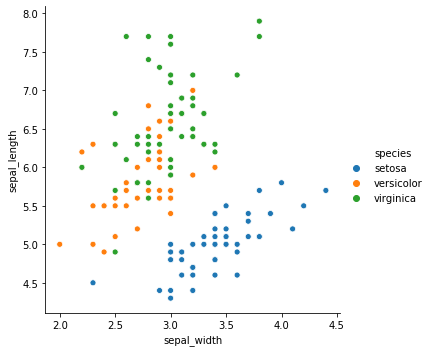

In [15]:
sns.relplot(x='sepal_width', y='sepal_length', hue="species", data=iris)

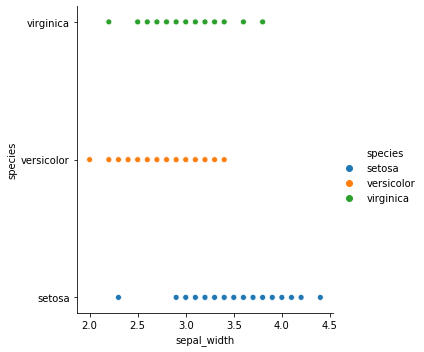

In [16]:
sns.relplot(x='sepal_width', y='species', hue="species", data=iris)

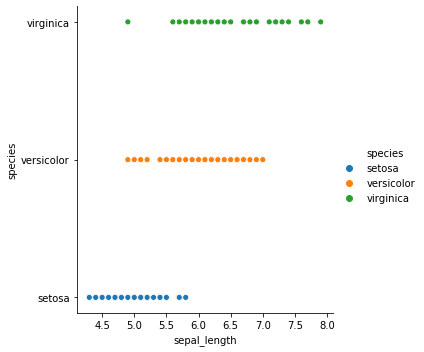

In [17]:
sns.relplot(x='sepal_length', y='species', hue="species", data=iris)

In [18]:
#4. Which features would be best used to predict species?

- Petal length and petal width

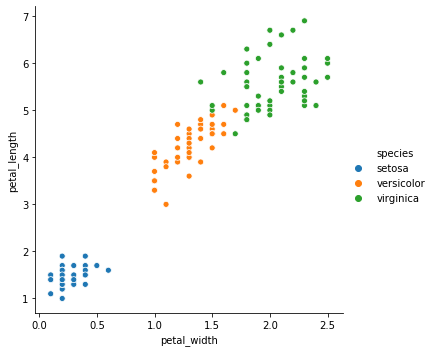

In [19]:
sns.relplot(x='petal_width', y='petal_length', hue="species", data=iris)

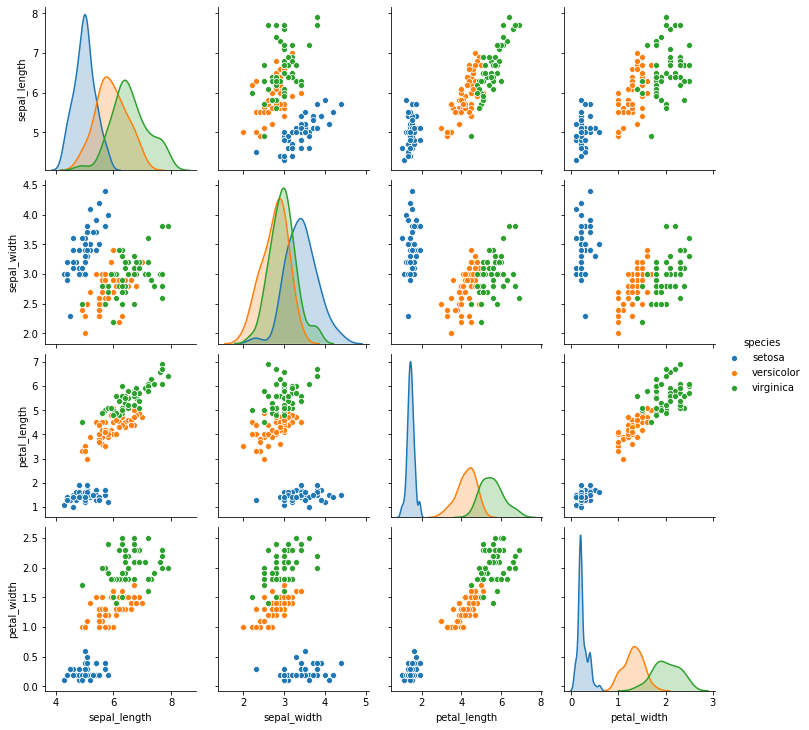

In [20]:
sns.pairplot(iris, hue="species")

In [21]:
#1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

from pydataset import data
anscombe = sns.load_dataset('anscombe')
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [22]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [23]:
anscombe = data('anscombe')
data('anscombe', show_doc = True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [68]:
datasets = anscombe.groupby('dataset')
datasets.describe()

KeyError: 'dataset'

In [66]:
sns.relplot(x='x', y='y', hue="y", data=anscombe)

ValueError: Could not interpret input 'x'

In [28]:
sns.relplot(x='x',y='y',hue='dataset',col='dataset',data=anscombe)
plt.tight_layout();

ValueError: Could not interpret input 'x'

In [32]:
#2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [33]:
from pydataset import data

In [34]:
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [35]:
insect_sprays.spray.nunique()

6

In [36]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

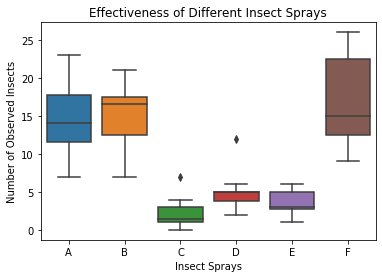

In [37]:
sns.boxplot(data=insect_sprays, y='count', x='spray')
plt.title('Effectiveness of Different Insect Sprays')
plt.xlabel('Insect Sprays')
plt.ylabel('Number of Observed Insects')
plt.show()

In [38]:
#3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [39]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [40]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [41]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

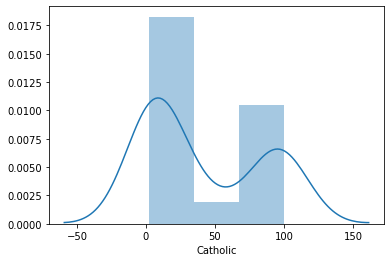

In [42]:
sns.distplot(swiss.Catholic)

In [43]:
catholic_bool = lambda x: x > 50
swiss['is_catholic'] = swiss.Catholic.apply(catholic_bool)
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [44]:
# Does whether or not a province is Catholic influence fertility?

Text(0.5, 1, 'Does being Catholic influence fertility?')

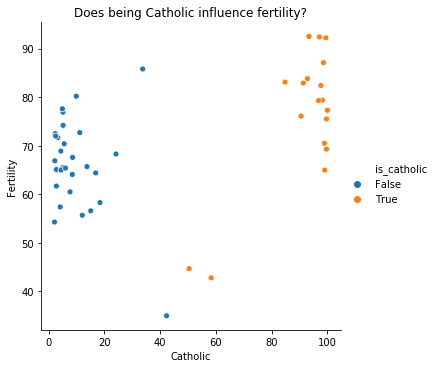

In [45]:
sns.relplot(x='Catholic',y='Fertility',hue='is_catholic',data=swiss)
plt.title('Does being Catholic influence fertility?')

In [46]:
# What measure correlates most strongly with fertility?

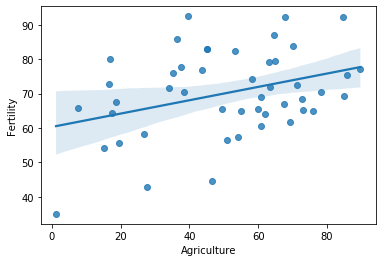

In [47]:
sns.regplot(x='Agriculture',y='Fertility',data=swiss)

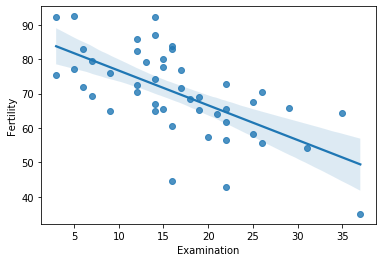

In [48]:
sns.regplot(x='Examination',y='Fertility',data=swiss)

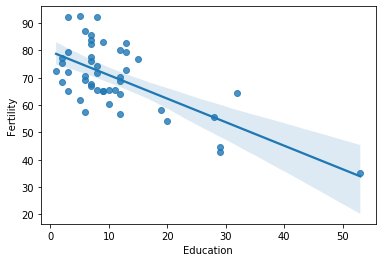

In [49]:
sns.regplot(x='Education',y='Fertility',data=swiss)

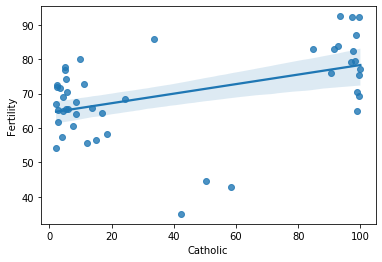

In [50]:
sns.regplot(x='Catholic',y='Fertility',data=swiss)

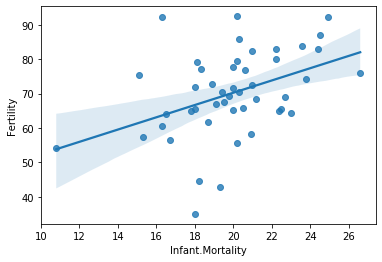

In [51]:
sns.regplot(x='Infant.Mortality',y='Fertility',data=swiss)

In [52]:
#4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [53]:
from env import host, username, password
url = (f'mysql+pymysql://{username}:{password}@{host}/chipotle')

In [54]:
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [55]:
pop_items = chipotle.groupby('item_name').quantity.agg('sum')
pop_items.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [56]:
money = chipotle.assign(price = chipotle['item_price'].str.replace('$','').astype(float))
money

,id,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75


In [57]:
rev_items = money.groupby('item_name').price.agg('sum')
rev_items.sort_values(ascending=False)

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

In [58]:
pop_and_rev = pd.merge(pop_items, rev_items, left_on = 'item_name', right_on = 'item_name', how = 'inner')
sorted_chipotle = pop_and_rev.sort_values('quantity', ascending=False)
top_chipotle_items = sorted_chipotle.head(4)
top_chipotle_items

,quantity,price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43


Text(0, 0.5, 'Revenue')

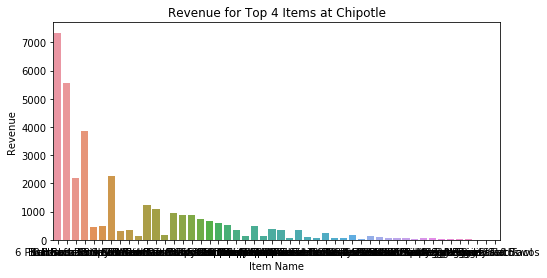

In [59]:
plt.figure(figsize=(8,4))
plt.title('Revenue for Top 4 Items at Chipotle')
sns.barplot(x=pop_and_rev.index, y='price', data=sorted_chipotle)
plt.xlabel('Item Name')
plt.ylabel('Revenue')

In [60]:
#5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [61]:
sleep = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

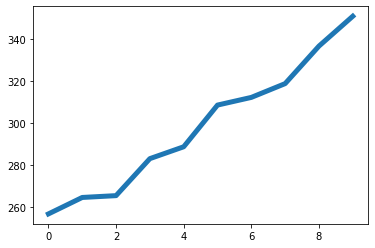

In [62]:
avg_sleep = pd.DataFrame(sleep.groupby('Days').Reaction.agg('mean'))
plt.plot(avg_sleep.index, avg_sleep.Reaction, linewidth=5)

In [63]:
sleep.shape

(180, 3)

In [64]:
sleep.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


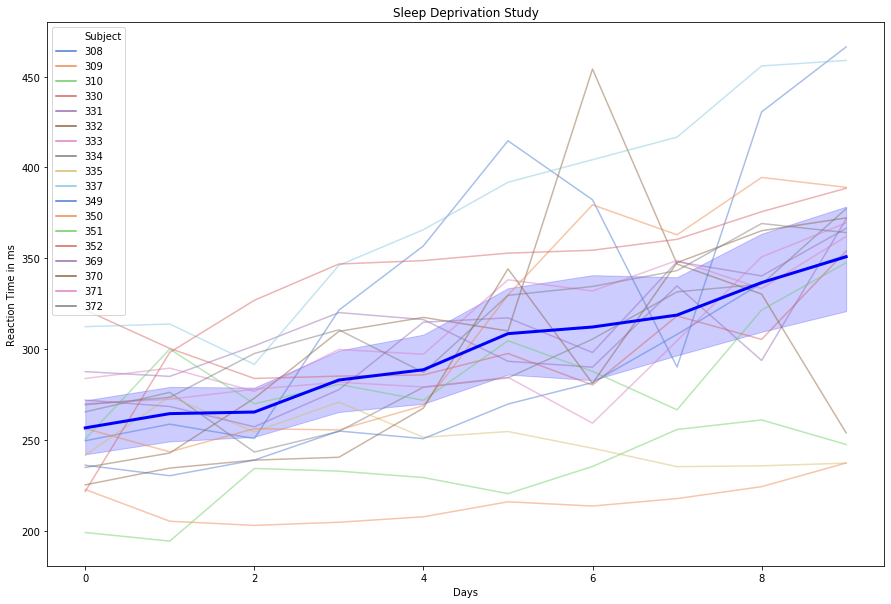

In [65]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Days', y='Reaction',hue='Subject', data=sleep, palette='muted', alpha=.47)
sleep_avg = sns.lineplot(x='Days',y='Reaction',data=sleep, linewidth=3, color='blue')
plt.title('Sleep Deprivation Study')
plt.xlabel('Days')
plt.ylabel('Reaction Time in ms')
plt.legend()
plt.show()